In [1]:
import numpy as np
import xbrl.envs as bandits
from xbrl.algs.generalized_linear import UCBGLM
from xbrl.envs.hlsutils import is_hls, derank_hls, hls_rank, random_transform
import matplotlib.pyplot as plt

In [2]:
rng = np.random.RandomState(seed=0)
n_runs = 3
tol = 1e-6
seed = 0
horizon = 20000

In [3]:
features = np.load("../problem_data/new_features.npy")
dim = features.shape[-1]
param = np.load("../problem_data/new_param.npy")
rewards = features @ param

In [4]:
env = bandits.CBFinite(feature_matrix=features,
                       rewards=rewards,
                       noise="bernoulli",
                       seed=seed)

In [5]:
algo = UCBGLM(
        env=env,
        seed=seed,
        update_every_n_steps=1,
        delta=0.01,
        bonus_scale=1.,
        opt_tolerance=1e-8,
        true_param=None,
        param_bound = np.linalg.norm(param))

277.60717426079356


277.60717426079356


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:00<00:00, 47.55it/s, % optimal arm (last 100 steps)=97.03%, train loss=0, expected regret=431]


277.60717426079356


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:22<00:00, 52.28it/s, % optimal arm (last 100 steps)=95.05%, train loss=0, expected regret=386]


277.60717426079356


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:22<00:00, 52.34it/s, % optimal arm (last 100 steps)=97.03%, train loss=0, expected regret=392]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:27<00:00, 51.62it/s, % optimal arm (last 100 steps)=70.30%, train loss=0, expected regret=857]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:26<00:00, 51.80it/s, % optimal arm (last 100 steps)=70.30%, train loss=0, expected regret=830]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:29<00:00, 51.37it/s, % optimal arm (last 100 steps)=70.30%, train loss=0, expected regret=812]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:30<00:00, 51.25it/s, % optimal arm (last 100 steps)=72.28%, train loss=0, expected regret=844]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:26<00:00, 51.74it/s, % optimal arm (last 100 steps)=80.20%, train loss=0, expected regret=870]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:25<00:00, 51.84it/s, % optimal arm (last 100 steps)=78.22%, train loss=0, expected regret=911]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:29<00:00, 51.39it/s, % optimal arm (last 100 steps)=74.26%, train loss=0, expected regret=826]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:30<00:00, 51.21it/s, % optimal arm (last 100 steps)=80.20%, train loss=0, expected regret=848]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:28<00:00, 51.48it/s, % optimal arm (last 100 steps)=80.20%, train loss=0, expected regret=885]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:28<00:00, 51.53it/s, % optimal arm (last 100 steps)=73.27%, train loss=0, expected regret=1.09e+3]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:31<00:00, 51.14it/s, % optimal arm (last 100 steps)=78.22%, train loss=0, expected regret=1.15e+3]


100.31920138669011


100%|██████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:10<00:00, 46.42it/s, % optimal arm (last 100 steps)=70.30%, train loss=0, expected regret=1.13e+3]


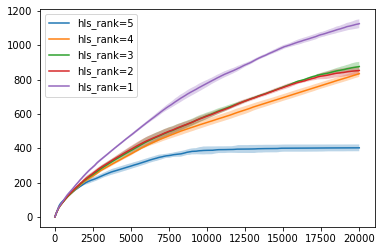

In [6]:
results = []
lines = []
ranks = [5, 4, 3, 2, 1]
for k in range(len(ranks)):
    regrets = []
    results.append([])
    if ranks[k] < dim:
        _features, _param = derank_hls(features,
                                    param,
                                    newrank = ranks[k],
                                    transform=False,
                                    normalize=True)
    else:
        _features, _param = features.copy(), param.copy()
    _rewards = _features @ _param
    for i in range(n_runs):
        env = bandits.CBFinite(feature_matrix=_features,
                       rewards=_rewards,
                       noise="bernoulli",
                       seed=i)
        agent = UCBGLM(
                    env=env,
                    seed=i,
                    update_every_n_steps=1,
                    delta=0.01,
                    bonus_scale=1.,
                    opt_tolerance=1e-8,
                    true_param=None,
                    param_bound = np.linalg.norm(_param))
        agent.reset()
        result = agent.run(horizon=horizon)
        results[k].append(result)
        regrets.append(result['expected_regret'])
    regrets = np.array(regrets)
    avg_regret = np.mean(regrets, axis=0)
    std_regret = np.std(regrets, axis = 0)
    
    line, = plt.plot(avg_regret, label="hls_rank=%d"%ranks[k])
    plt.fill_between(range(len(avg_regret)), avg_regret-std_regret, avg_regret+std_regret, alpha=0.3)
    lines.append(line)
plt.legend(handles=lines)
plt.show()